In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.base import ClusterMixin
from sklearn.base import BaseEstimator, ClassifierMixin


%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

In [2]:
class Kmeans(BaseEstimator, ClusterMixin): 
    
    def __init__(self, k=2, metric='euclidean', max_iter=1000, random_state=None):
        """
        Инициализация метода
        :k - количество кластеров
        :metric - функция расстояния между объектами
        :max_iter - максиальное количество итераций
        :random_state - seed для инициализации генератора случайных чисел
        """
        
        self.k = k
        self.random_state = random_state
        self.metric = metric
        self.max_iter = max_iter

    def fit(self, X, y=None):
        """
        Процедура обучения k-means
        """
        
        # Инициализация генератора случайных чисел
        np.random.seed(self.random_state)
        
        # Массив с метками кластеров для каждого объекта из X
        self.labels = np.empty(X.shape[0])
        
        # Массив с центройдами кластеров
        self.centroids = np.empty((self.k, X.shape[1]))
        
        ## Your Code Here
        # ...
        #print self.centroids - X[0]
        self.centroids=X[np.random.choice (range (X.shape[0]), self.k)]
        for i in xrange (self.max_iter):
            #print self.centroids
            for j in xrange (len (self.labels)):
                self.labels[j] = np.argmin (map (np.linalg.norm, self.centroids - X[j]))
            #print self.labels
            old = np.copy (self.centroids)
            for j in xrange (self.k):
                if len (X[self.labels == j]) != 0:
                    self.centroids[j] = np.mean (X[self.labels == j], axis=0)
            
            print str (np.linalg.norm (old-self.centroids, ord='fro')) + " iteration " + str (i)
            if np.linalg.norm (old-self.centroids) < 1e-3:
                print "converged in " + str(i) + " iterations"
                return self
                
        
        return self

    def predict(self, X, y=None):
        """
        Процедура предсказания кластера
        
        Возвращает метку ближайшего кластера для каждого объекта
        """
        
        labels = np.empty(X.shape[0])
        for j in xrange (len (labels)):
                labels[j] = np.argmin (map (np.linalg.norm, self.centroids - X[j]))
        
        
        return labels
    

In [3]:
X, y = make_blobs(n_samples=2000, n_features=2, centers=3, cluster_std=1, 
           center_box=(-10.0, 10.0), shuffle=False, random_state=1234)

3.91295820302 iteration 0
2.18935501075 iteration 1
0.450754223903 iteration 2
0.0 iteration 3
converged in 3 iterations


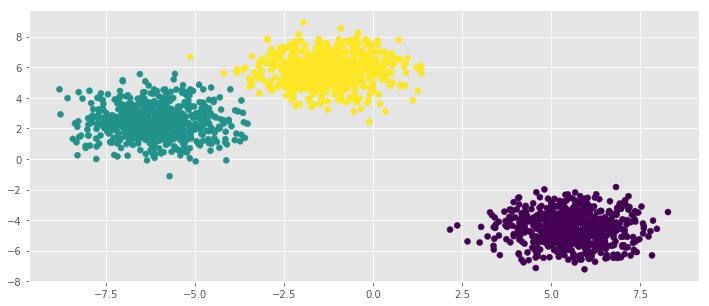

In [4]:
# Your Code Here
#print X
km = Kmeans (k=3)
km.fit (X)
labels = km.predict (X)
plt.scatter(X[:,0], X[:, 1], c=labels)

In [5]:
df_sns = pd.read_csv('snsdata.csv', sep=',')
df_sns.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [6]:
df_sns = df_sns.drop (['gradyear', 'gender', 'age', 'friends'],axis=1)

In [7]:
for i in df_sns.columns:
    mean=df_sns[i].mean()
    std=df_sns[i].std()
    df_sns[i]=(df_sns[i]-mean)/std

In [8]:
km = Kmeans(9, max_iter=15)
km.fit(df_sns.values)

8.88673697826 iteration 0
3.66779609453 iteration 1
1.83710157389 iteration 2
1.18330411532 iteration 3
0.827781148203 iteration 4
0.821367890899 iteration 5
1.05421966633 iteration 6
1.40774165112 iteration 7
1.35603963286 iteration 8
1.41983632218 iteration 9
0.922077824791 iteration 10
0.60454956108 iteration 11
0.385637862515 iteration 12
0.284953276059 iteration 13
0.197164852228 iteration 14


Kmeans(k=9, max_iter=15, metric='euclidean', random_state=None)

In [9]:
df_sns.loc[:, 'cluster'] = km.labels
for i, group in df_sns.groupby ('cluster'):
    print "cluster " + str(i)+ ", " + str(len(group)) + " elements"
    print group.drop('cluster', axis=1).mean().sort_values (ascending=False)
    print 

cluster 0.0, 844 elements
hollister       4.158210
abercrombie     4.004392
shopping        0.801569
mall            0.578630
clothes         0.570723
hair            0.425557
hot             0.405910
cheerleading    0.393925
cute            0.369873
swimming        0.237353
football        0.205030
dance           0.197877
volleyball      0.191063
basketball      0.141894
tennis          0.138182
music           0.133651
sexy            0.116254
sports          0.100274
soccer          0.099446
death           0.091107
dress           0.090540
blonde          0.061306
rock            0.053663
kissed          0.050942
die             0.044811
softball        0.044765
drugs           0.041130
baseball        0.019159
sex             0.016100
god            -0.000629
drunk          -0.009630
jesus          -0.021558
church         -0.031897
bible          -0.052138
band           -0.103640
marching       -0.108402
dtype: float64
cluster 1.0, 18437 elements
blonde         -0.030579
tennis